In [1]:
import pandas as pd

# Data Loading

In [2]:
df_rec = pd.read_csv('../data/raw/recipes.csv', index_col='id')
df_rec.head()

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
df_int = pd.read_csv('../data/raw/interactions.csv')
df_int.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Data Cleaning

## Data Cleaning (Recipes)

In [4]:
import ast
df_rec.nutrition = df_rec.nutrition.apply(ast.literal_eval)
df_rec.tags = df_rec.tags.apply(ast.literal_eval)
df_rec.steps = df_rec.steps.apply(ast.literal_eval)
df_rec.ingredients = df_rec.ingredients.apply(ast.literal_eval)

In [5]:
def get_nutrition(x):
    # Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
    [cal, fat, sugar, sodium, protein, sat_fat, carbs] = x
    return pd.Series({
        'calories': cal,
        'total_fat_pdv': fat,
        'sugar_pdv': sugar,
        'sodium_pdv': sodium,
        'protein_pdv': protein,
        'saturated_fat_pdv': sat_fat,
        'carbohydrates_pdv': carbs
    })

nutrition = df_rec.nutrition.apply(get_nutrition)
df_rec = df_rec.join(nutrition)
df_rec = df_rec.drop(['nutrition'], axis=1)

In [6]:
# https://www.food.com/recipe/no-bake-granola-balls-261647
# Misinputted as 2147483647 min, which overflows later calculations
df_rec.loc[261647, 'minutes'] = 25

In [7]:
df_rec.minutes = pd.to_timedelta(df_rec.minutes, unit='m')
df_rec.submitted = pd.to_datetime(df_rec.submitted)

In [8]:
df_rec.head()

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
id,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,0 days 00:55:00,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,0 days 00:30:00,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,0 days 02:10:00,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,0 days 00:45:00,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,0 days 03:10:00,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


## Data Cleaning (Interactions)

In [9]:
df_int.date = pd.to_datetime(df_int.date)

In [10]:
df_int.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Data Exploration

In [11]:
df_rec.describe()

,minutes,contributor_id,n_steps,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
count,231637,2.316370e+05,231637.000000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000
mean,0 days 02:07:38.719461916,5.534885e+06,9.765499,9.051153,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403
std,2 days 01:06:20.227720184,9.979141e+07,5.995128,3.734796,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560
min,0 days 00:00:00,2.700000e+01,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0 days 00:20:00,5.690500e+04,6.000000,6.000000,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000
50%,0 days 00:40:00,1.736140e+05,9.000000,9.000000,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000
75%,0 days 01:05:00,3.982750e+05,12.000000,11.000000,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000
max,730 days 00:00:00,2.002290e+09,145.000000,43.000000,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000


In [12]:
def plot_hist(series: pd.Series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    outlier_threshold = 1.5 * iqr
    outlier = (series < series.quantile(0.25) - outlier_threshold) | (series > series.quantile(0.75) + outlier_threshold)
    pct_outliers = outlier.sum() / len(series) * 100

    name = str(series.name).title()
    ax = series[~outlier].plot.hist()
    ax.set_title(f'{name} per Recipe ({pct_outliers:.03}% Outliers Removed)')
    ax.set_xlabel(name)
    return ax


<AxesSubplot: title={'center': 'Calories per Recipe (6.79% Outliers Removed)'}, xlabel='Calories', ylabel='Frequency'>

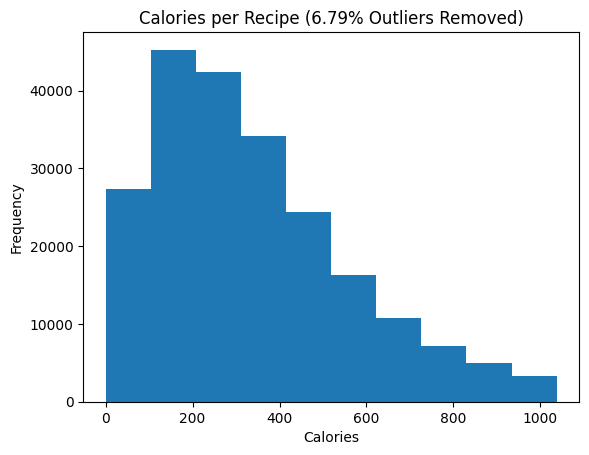

In [13]:
plot_hist(df_rec.calories)

<AxesSubplot: title={'center': 'N_Steps per Recipe (4.32% Outliers Removed)'}, xlabel='N_Steps', ylabel='Frequency'>

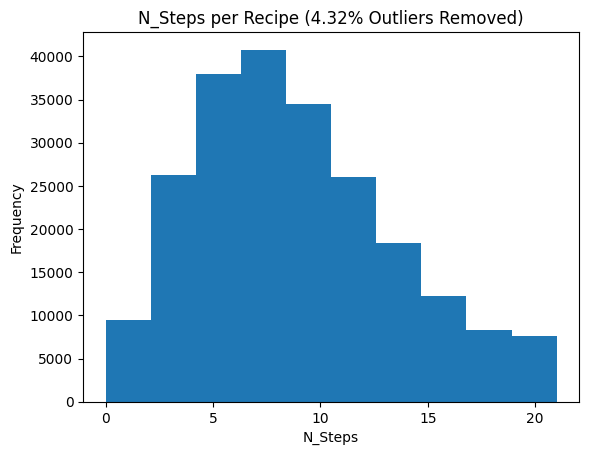

In [14]:
plot_hist(df_rec.n_steps)

<AxesSubplot: title={'center': 'N_Ingredients per Recipe (1.63% Outliers Removed)'}, xlabel='N_Ingredients', ylabel='Frequency'>

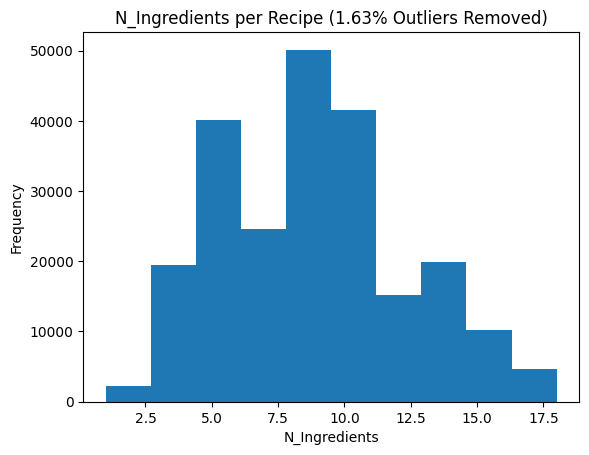

In [15]:
plot_hist(df_rec.n_ingredients)

Text(0.5, 0, 'Count')

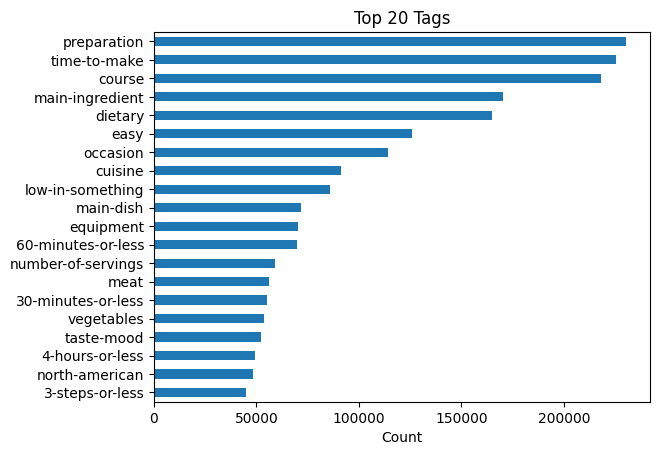

In [16]:
tag_counts = df_rec.tags.explode().value_counts()[19::-1]
ax = tag_counts.plot.barh()
ax.set_title(f'Top {len(tag_counts)} Tags')
ax.set_xlabel('Count')

In [17]:
df_rec.dtypes

name                          object
minutes              timedelta64[ns]
contributor_id                 int64
submitted             datetime64[ns]
tags                          object
n_steps                        int64
steps                         object
description                   object
ingredients                   object
n_ingredients                  int64
calories                     float64
total_fat_pdv                float64
sugar_pdv                    float64
sodium_pdv                   float64
protein_pdv                  float64
saturated_fat_pdv            float64
carbohydrates_pdv            float64
dtype: object

In [18]:
df_rec.head()

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
id,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,0 days 00:55:00,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,0 days 00:30:00,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,0 days 02:10:00,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,0 days 00:45:00,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,0 days 03:10:00,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [19]:
(
    df_rec
    .drop(['n_steps', 'n_ingredients', 'ingredients', 'tags', 'contributor_id'], axis=1)
    .reset_index()
    .to_json(
        '../data/processed/recipes.json',
        date_format='iso',
        orient='records',
        lines=True,
        index=True,
    )
)
# df_int.to_json('../data/processed/interactions.gz', orient='records', lines=True, compression='gzip')

In [20]:
df_rec.shape[0]

231637

# Write to TigerGraph

In [21]:
import pyTigerGraph as tg
from dotenv import dotenv_values

In [26]:
config = dotenv_values('../.env')

conn = tg.TigerGraphConnection(
    host="https://ucsd-recipe-rec.i.tgcloud.io",
    graphname="RecipeGraph",
    gsqlSecret=config.get('TG_SECRET')
)
conn.getToken(config.get('TG_SECRET'));

## Write Data

In [27]:
tg_rec = df_rec.copy()
tg_rec.submitted = tg_rec.submitted.astype(str)
tg_rec.minutes = tg_rec.minutes.dt.total_seconds() / 60
tg_rec.description = tg_rec.description.fillna("")
tg_rec.dropna(inplace=True) # there's one row with NULL name - safe to drop
tg_rec.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 137739 to 298509
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               231636 non-null  object 
 1   minutes            231636 non-null  float64
 2   contributor_id     231636 non-null  int64  
 3   submitted          231636 non-null  object 
 4   tags               231636 non-null  object 
 5   n_steps            231636 non-null  int64  
 6   steps              231636 non-null  object 
 7   description        231636 non-null  object 
 8   ingredients        231636 non-null  object 
 9   n_ingredients      231636 non-null  int64  
 10  calories           231636 non-null  float64
 11  total_fat_pdv      231636 non-null  float64
 12  sugar_pdv          231636 non-null  float64
 13  sodium_pdv         231636 non-null  float64
 14  protein_pdv        231636 non-null  float64
 15  saturated_fat_pdv  231636 non-null  float64
 1

In [28]:
tg_rec.iloc[0]

name                        arriba   baked winter squash mexican style
minutes                                                           55.0
contributor_id                                                   47892
submitted                                                   2005-09-16
tags                 [60-minutes-or-less, time-to-make, course, mai...
n_steps                                                             11
steps                [make a choice and proceed with recipe, depend...
description          autumn is my favorite time of year to cook! th...
ingredients          [winter squash, mexican seasoning, mixed spice...
n_ingredients                                                        7
calories                                                          51.5
total_fat_pdv                                                      0.0
sugar_pdv                                                         13.0
sodium_pdv                                                         0.0
protei

## Insert Vertices

In [29]:
conn.upsertVertexDataFrame(
    tg_rec,
    vertexType='Recipe',
    attributes={
        'name': 'name',
        'minutes': 'minutes',
        'submitted': 'submitted',
        'description': 'description',
        'calories': 'calories',
        'total_fat_pdv': 'total_fat_pdv',
        'sugar_pdv': 'sugar_pdv',
        'sodium_pdv': 'sodium_pdv',
        'protein_pdv': 'protein_pdv',
        'saturated_fat_pdv': 'saturated_fat_pdv',
        'carbohydrates_pdv': 'carbohydrates_pdv',
    }
)

231636

In [30]:
ingredients = tg_rec.ingredients.explode().reset_index(drop=False)

# TigerGraph breaks when commas are used as keys
ingredients['ingredients'] = ingredients.ingredients.str.replace(',', '')
unique_ingredients = ingredients.drop_duplicates(subset=['ingredients'])

In [31]:
conn.upsertVertexDataFrame(
    unique_ingredients,
    vertexType='Ingredient',
    v_id='ingredients',
    attributes={}
)

14942

In [32]:
tags = tg_rec.tags.explode().reset_index(drop=False)
unique_tags = tags.drop_duplicates(subset=['tags'])
unique_tags

,id,tags
0,137739,60-minutes-or-less
1,137739,time-to-make
2,137739,course
3,137739,main-ingredient
4,137739,cuisine
...,...,...
3371182,408989,chicken-stews
3371183,408989,chicken-stew
3414379,498434,Throw the ultimate fiesta with this sopaipilla...
3639628,329073,roast-beef-main-dish


In [33]:
conn.upsertVertexDataFrame(
    unique_tags,
    vertexType='Tag',
    v_id='tags',
    attributes={}
)

550

In [34]:
users = df_int.drop_duplicates(subset=['user_id'])
users

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132358,2000137415,82303,2015-04-13,1,I&#039;ve improvised sauces that turned out be...
1132359,2001898209,82303,2018-07-05,5,This is the best and easiest hot fudge ever. I...
1132360,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...


In [35]:
conn.upsertVertexDataFrame(
    users,
    vertexType='User',
    v_id='user_id',
    attributes={}
)

226570

## Insert Edges

In [36]:
import numpy as np

tg_int = df_int.copy()
tg_int = tg_int[tg_int.recipe_id.isin(tg_rec.index)] # ensure all recipe IDs are in the graph
tg_int.user_id = tg_int.user_id.astype(str)
tg_int.date = tg_int.date.astype(str)
tg_int.rating = tg_int.rating.astype(np.uint8)
tg_int.review = tg_int.review.fillna("")
tg_int.review = tg_int.review.str.strip() # some reviews came in CRAZY long - trim all trailing/leading whitespace
tg_int

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [37]:
conn.upsertEdgeDataFrame(
    tg_int,
    edgeType='Review',
    sourceVertexType='Recipe',
    from_id='recipe_id',
    targetVertexType='User',
    to_id='user_id',
    attributes={
        'date': 'date',
        'rating': 'rating',
        # 'review': 'review'
    }
)

1132366

In [38]:
ingredients.head()

,id,ingredients
0,137739,winter squash
1,137739,mexican seasoning
2,137739,mixed spice
3,137739,honey
4,137739,butter


In [39]:
ingredients.ingredients.str.contains(',', regex=False).sum()

0

In [40]:
conn.upsertEdgeDataFrame(
    ingredients,
    edgeType='Recipe_Ingredient',
    sourceVertexType='Recipe',
    from_id='id',
    targetVertexType='Ingredient',
    to_id='ingredients',
    attributes={}
)

2096572

In [41]:
tags.head()

,id,tags
0,137739,60-minutes-or-less
1,137739,time-to-make
2,137739,course
3,137739,main-ingredient
4,137739,cuisine


In [42]:
conn.upsertEdgeDataFrame(
    tags,
    edgeType='Recipe_Tag',
    sourceVertexType='Recipe',
    from_id='id',
    targetVertexType='Tag',
    to_id='tags',
    attributes={}
)

4141566

In [43]:
conn.getVertexCount('*')

{'Recipe': 231636, 'Ingredient': 14942, 'Tag': 551, 'User': 226570}

In [44]:
conn.getEdgeCount('*')

{'Review': 1132366, 'Recipe_Ingredient': 2096572, 'Recipe_Tag': 1722573}

In [45]:
from pyTigerGraph.visualization import drawSchema

drawSchema(conn.getSchema(force=True))

CytoscapeWidget(cytoscape_layout={'name': 'circle', 'animate': True, 'padding': 1}, cytoscape_style=[{'selecto…

# Testing

In [58]:
df = tg_int[tg_int.user_id == '1293707']
df.set_index('recipe_id').join(tg_rec)

,user_id,date,rating,review,name,minutes,contributor_id,submitted,tags,n_steps,...,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
recipe_id,,,,,,,,,,,,,,,,,,,,,
40893,1293707,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495.0,1533,2002-09-21,"[weeknight, time-to-make, course, main-ingredi...",4,...,easy soup for the crockpot.,"[great northern beans, yellow onion, diced gre...",9,204.8,5.0,9.0,26.0,24.0,2.0,10.0
134316,1293707,2011-08-28,5,I haven't really eaten turnips much (except in...,turnip and carrot mash,40.0,210188,2005-08-22,"[60-minutes-or-less, time-to-make, course, mai...",7,...,this is a dish i used to make only at thanksgi...,"[carrots, turnips, cream, butter, salt, pepper]",6,78.3,0.0,38.0,6.0,4.0,0.0,6.0
39446,1293707,2011-02-11,5,Wow! Delicious and seems versatile. This time ...,koshari,55.0,27678,2002-09-04,"[60-minutes-or-less, time-to-make, course, mai...",11,...,i like to think of this vegetarian dish as egy...,"[brown lentils, basmati rice, pasta, onions, g...",9,359.9,9.0,20.0,0.0,28.0,4.0,20.0
253891,1293707,2011-01-18,5,These are delicious! I didn't have any baking ...,ww 1 pt weight watcher muffins,25.0,537937,2007-09-19,"[30-minutes-or-less, time-to-make, course, pre...",5,...,i eat one of these almost everyday. they are ...,"[all-bran cereal, fat-free blueberry muffin mi...",4,27.1,0.0,6.0,2.0,2.0,0.0,2.0
204257,1293707,2011-11-04,0,"Ooooh this is delicious! Was definitely salty,...",polenta lasagna with feta and kale,45.0,242161,2007-01-08,"[60-minutes-or-less, time-to-make, course, mai...",17,...,"this is one of my favorite recipes, full of me...","[prepared polenta, marinara sauce, pecorino ro...",11,193.7,20.0,23.0,24.0,13.0,28.0,4.0
99564,1293707,2011-01-06,4,This was delicious! I did not pay attention to...,lentil soup for people who thought they hated ...,120.0,153190,2004-09-09,"[lactose, time-to-make, course, main-ingredien...",12,...,"i love this recipe, friends crave it, some hav...","[vegetable stock, red lentils, garlic cloves, ...",20,190.1,2.0,17.0,2.0,25.0,1.0,11.0
115110,1293707,2011-01-26,5,Simply delicious. I think I'm going to try egg...,secretly delicious spinach pie,50.0,203607,2005-04-02,"[60-minutes-or-less, time-to-make, course, mai...",14,...,the tortilla adds a delicious crunchy shell an...,"[jumbo eggs, milk, roasted garlic cloves, lemo...",9,284.2,25.0,3.0,25.0,34.0,38.0,5.0
219563,1293707,2011-07-19,5,Delicious! I could have eaten all 4 myself lol...,roasted vegetarian sandwich with brie cheese ...,50.0,226066,2007-03-29,"[60-minutes-or-less, time-to-make, course, mai...",10,...,from r. reisman. can't wait to try it!,"[red onion, red bell pepper, portabella mushro...",11,143.4,8.0,10.0,8.0,10.0,9.0,6.0
178556,1293707,2011-11-06,5,Very good! Love the butter/dijon/garlic spread...,pressed cuban sandwich with garlic dijon butter,83.0,37449,2006-07-20,"[time-to-make, course, main-ingredient, cuisin...",24,...,a sandwich that originated in cuba! yum! adapt...,"[garlic, olive oil, dijon mustard, butter, hoa...",10,577.2,37.0,13.0,55.0,69.0,60.0,18.0


In [56]:
tg_rec

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv
id,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55.0,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,30.0,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,130.0,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,45.0,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,190.0,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60.0,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
493372,zydeco spice mix,5.0,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
308080,zydeco ya ya deviled eggs,40.0,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0


# Data Analysis

In [21]:
ingredients = df_rec.ingredients.explode().reset_index(drop=False)
unique_ingredients = ingredients.drop_duplicates(subset=['ingredients'])
unique_ingredients

,id,ingredients
0,137739,winter squash
1,137739,mexican seasoning
2,137739,mixed spice
3,137739,honey
4,137739,butter
...,...,...
2092535,20948,apricot jell-o
2094834,485697,rosarita premium whole black beans
2094835,485697,hunt's fire roasted diced tomatoes
2096027,334581,skinless halibut fillet


In [30]:
unique_ingredients[unique_ingredients.ingredients.str.contains(',', regex=False)]

,id,ingredients
77,67888,"orange, juice of"
212,49262,"lemon, juice of"
578,81185,"lemons, juice of"
669,26835,"lemon, rind of"
2579,296983,"lemon, zest of"
...,...,...
1805789,343630,"navel orange, zest of"
1877342,46283,"tangerines, zest of"
1877472,110945,"tangerines, juice of"
1948792,376960,"ruby red grapefruit, juice of"
